# Project

## 1.Modules

In [2]:
# Import api_script.py file
import api_script
# Import web_scrapper.py file
import web_scrapper

import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from scipy import stats

## 2.Getting Web Scrapper Data

In [2]:
web_scrapper.get_web_scrapper_data()

Running web_scrapper.py
Extracting data from https://www.zillow.com and sending to DB
Analyzing page 1
Done.
Analyzing page 2
Done.
Analyzing page 3
Done.
Analyzing page 4
Done.
Analyzing page 5
Done.
Analyzing page 6
Done.
Analyzing page 7
Done.
Analyzing page 8
Done.
Analyzing page 9
Done.
Analyzing page 10
Done.
Analyzing page 11
Done.
Analyzing page 12
Done.
Analyzing page 13
Done.
Analyzing page 14
Done.
Analyzing page 15
Done.
Analyzing page 16
Done.
Analyzing page 17
Done.
Analyzing page 18
Done.
Analyzing page 19
Done.


Ending scrapper operation.


## 3.Getting API Data

In [2]:
api_script.get_api_data()

Running api_script.py
Extracting API data from https://cde.ucr.cjis.gov/LATEST/webapp/# and sending to DB
State GA has already crime data in the DB
State TX has already crime data in the DB
State MI has already crime data in the DB
State CA has already crime data in the DB
State FL has already crime data in the DB
State IL has already crime data in the DB
State PA has already crime data in the DB
State NJ has already crime data in the DB
State MO has already crime data in the DB
State TN has already crime data in the DB
State NV has already crime data in the DB
State AZ has already crime data in the DB
State MD has already crime data in the DB
State IN has already crime data in the DB
State SC has already crime data in the DB
State NC has already crime data in the DB
State NE has already crime data in the DB
State OH has already crime data in the DB
State WA has already crime data in the DB
State CO has already crime data in the DB
State OR has already crime data in the DB
State CT has

## 4.Merging data from WebScrapping and API tables in DB



In [3]:
db = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="",
    database="web_scrapper_api_property_data",
)

cursor = db.cursor()

sql = """
    SELECT w.id, w.id_location, w.price, w.state, w.bedrooms, w.bathrooms, w.sq_ft, a.count_burglary, a.count_stolen_property, a.count_vandalism
    FROM web_scrapper_table w
    INNER JOIN api_table a ON w.state = a.state
"""

cursor.execute(sql)

columns = ['id', 'id_location', 'price', 'state', 'bedrooms', 'bathrooms', 'sq_ft', 'count_burglary', 'count_stolen_property', 'count_vandalism']
web_scrapper_api_property_data_df = pd.DataFrame(cursor.fetchall(), columns=columns)
web_scrapper_api_property_data_df.drop("id", inplace=True, axis=1)
cursor.close()
db.close()

web_scrapper_api_property_data_df

,id_location,price,state,bedrooms,bathrooms,sq_ft,count_burglary,count_stolen_property,count_vandalism
0,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3.0,3.0,1441.0,1885,2043,3664
1,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3.0,2.0,1387.0,7486,1050,7669
2,"46792 Oak Pointe Dr, Macomb, MI 48042 TOP AGEN...",329900,MI,4.0,2.0,2300.0,2168,2166,2837
3,"1122 Fieldstone Dr, Canton, GA 30114 MLS ID #7...",425000,GA,4.0,3.0,2452.0,1885,2043,3664
4,"38655 Cedarbrook Ct, Farmington Hills, MI 4833...",529900,MI,3.0,3.0,3916.0,2168,2166,2837
...,...,...,...,...,...,...,...,...,...
858,"597 County Line Rd, Ontario, NY 14519 MLS ID #...",329900,NY,3.0,2.0,2128.0,4512,2508,11463
859,"1969 Frenzel Dr, Apopka, FL 32703 BEYCOME OF F...",250000,FL,3.0,2.0,1304.0,806,182,1454
860,"1203 Lashley Park Dr, Gibsonville, NC 27249 $1...",180000,NC,3.0,2.0,NaN,5273,3460,2707
861,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5.0,3.0,2058.0,7486,1050,7669


## 5.Data Quality

### 5.1.Completness

In [4]:
# Null % per column
100 - web_scrapper_api_property_data_df.notnull().mean() * 100

id_location              0.000000
price                    0.000000
state                    0.000000
bedrooms                 0.231750
bathrooms                0.231750
sq_ft                    4.171495
count_burglary           0.000000
count_stolen_property    0.000000
count_vandalism          0.000000
dtype: float64

### 5.2.Consistency

In [5]:
web_scrapper_api_property_data_df.dtypes

id_location               object
price                      int64
state                     object
bedrooms                 float64
bathrooms                float64
sq_ft                    float64
count_burglary             int64
count_stolen_property      int64
count_vandalism            int64
dtype: object

### 5.3.Quality of Categorical Data

In [6]:
state_counts = web_scrapper_api_property_data_df['state'].value_counts()
state_counts

state
FL    99
TX    65
GA    56
MI    52
CA    50
NY    46
SC    43
PA    32
OH    31
TN    29
MO    25
NC    25
AL    24
CO    23
AZ    22
NJ    19
VA    17
MA    17
IL    16
NE    16
OR    15
WA    14
KY    12
KS    11
LA    10
CT    10
IN     9
MN     9
OK     8
NV     8
AR     8
ID     7
WI     7
WV     6
MD     4
IA     3
NH     3
NM     3
DE     2
MS     2
RI     2
WY     1
SD     1
ME     1
Name: count, dtype: int64

### 5.4. Uniqueness

In [ ]:
print(web_scrapper_api_property_data_df.duplicated().sum())

0


In [ ]:
web_scrapper_api_property_data_df.nunique() # matches exactly the number of total entries in the dataset (83)

id_location              826
price                    402
state                     44
bedrooms                   9
bathrooms                  7
sq_ft                    666
count_burglary            44
count_stolen_property     43
count_vandalism           44
state_full                44
city                     559
dtype: int64

In [ ]:
len(web_scrapper_api_property_data_df)

826

### 5.5. Accuracy

In [ ]:
web_scrapper_api_property_data_df[web_scrapper_api_property_data_df['price'] <= 0]['price'].count()

0

## 6.Data Cleaning (Fixing)

In [ ]:
# Delete rows where price is less than 10,000
db = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="",
    database="web_scrapper_api_property_data",
)

cursor = db.cursor()

delete_sql = "DELETE FROM web_scrapper_table WHERE price < 10000"
cursor.execute(delete_sql)
db.commit()

cursor.execute(sql)

In [7]:
# Removing rows with Null
web_scrapper_api_property_data_df.dropna(inplace=True)
web_scrapper_api_property_data_df

,id_location,price,state,bedrooms,bathrooms,sq_ft,count_burglary,count_stolen_property,count_vandalism
0,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3.0,3.0,1441.0,1885,2043,3664
1,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3.0,2.0,1387.0,7486,1050,7669
2,"46792 Oak Pointe Dr, Macomb, MI 48042 TOP AGEN...",329900,MI,4.0,2.0,2300.0,2168,2166,2837
3,"1122 Fieldstone Dr, Canton, GA 30114 MLS ID #7...",425000,GA,4.0,3.0,2452.0,1885,2043,3664
4,"38655 Cedarbrook Ct, Farmington Hills, MI 4833...",529900,MI,3.0,3.0,3916.0,2168,2166,2837
...,...,...,...,...,...,...,...,...,...
857,"2201 Oriole St, Slidell, LA 70460 THE EGROUP, ...",212000,LA,3.0,2.0,1353.0,3290,2750,3184
858,"597 County Line Rd, Ontario, NY 14519 MLS ID #...",329900,NY,3.0,2.0,2128.0,4512,2508,11463
859,"1969 Frenzel Dr, Apopka, FL 32703 BEYCOME OF F...",250000,FL,3.0,2.0,1304.0,806,182,1454
861,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5.0,3.0,2058.0,7486,1050,7669


## 7.Data Exploration (Queries)

### 7.1. Top 3 Expensive and Cheapest Properties

In [ ]:
db = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="",
    database="web_scrapper_api_property_data",
)

cursor = db.cursor()

sql = """
    (SELECT * FROM web_scrapper_table ORDER BY price DESC LIMIT 3)
    UNION ALL
    (SELECT * FROM web_scrapper_table ORDER BY price ASC LIMIT 3)
"""

cursor.execute(sql)

results = cursor.fetchall()

for row in results:
    print(row)

cursor.close()
db.close()

columns = ["ID", "Location", "Price", "State", "Bedrooms", "Bathrooms", "Sq Ft"]
dfExpensive = pd.DataFrame(results, columns=columns)

dfExpensive

(8, '8828 Thrasher Ave, Los Angeles, CA 90069 TRULINE REALTY, Sierus Erdelyi DRE # 01870547', 6499000, 'CA', 4, 5, 4159)
(583, '400 New Salem Rd, Kingston, NY 12401 LISTING BY: CORCORAN COUNTRY LIVING RH', 5500000, 'NY', 7, 4, 5540)
(807, '179 Indian Mound Trl, Plantation Key, FL 33070 BERKSHIRE HATHAWAY HOMESERVICES KEYS REAL ESTATE - ISLAMORADA', 4500000, 'FL', 4, 3, 1960)
(531, '433 Acacia Dr, Stockbridge, GA 30281 MLS ID #7321751, CENTURY 21 RESULTS', 50000, 'GA', 3, 2, 1881)
(458, '4705 Virginia Ave, Saint Louis, MO 63111 GARCIA PROPERTIES', 50000, 'MO', 3, 2, 1820)
(257, '607 Parkview Dr, Chattanooga, TN 37411 $61,750', 61750, 'TN', 3, 2, 1104)


,ID,Location,Price,State,Bedrooms,Bathrooms,Sq Ft
0,8,"8828 Thrasher Ave, Los Angeles, CA 90069 TRULI...",6499000,CA,4,5,4159
1,583,"400 New Salem Rd, Kingston, NY 12401 LISTING B...",5500000,NY,7,4,5540
2,807,"179 Indian Mound Trl, Plantation Key, FL 33070...",4500000,FL,4,3,1960
3,531,"433 Acacia Dr, Stockbridge, GA 30281 MLS ID #7...",50000,GA,3,2,1881
4,458,"4705 Virginia Ave, Saint Louis, MO 63111 GARCI...",50000,MO,3,2,1820
5,257,"607 Parkview Dr, Chattanooga, TN 37411 $61,750",61750,TN,3,2,1104


### 7.2. Average price per bedroom

In [10]:
db = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="",
    database="web_scrapper_api_property_data",
)

cursor = db.cursor()
sql = """SELECT bedrooms, AVG(price) AS average_price
    FROM web_scrapper_table
    GROUP BY bedrooms
    ORDER BY bedrooms ASC
"""
cursor.execute(sql)
results = cursor.fetchall()

for row in results:
    print(f"Bedrooms: {row[0]}, Average Price: {row[1]:.1f}")

cursor.close()
db.close()

Bedrooms: None, Average Price: 174450.0
Bedrooms: 1, Average Price: 152000.0
Bedrooms: 2, Average Price: 287089.1
Bedrooms: 3, Average Price: 361923.4
Bedrooms: 4, Average Price: 524200.8
Bedrooms: 5, Average Price: 581515.7
Bedrooms: 6, Average Price: 785311.1
Bedrooms: 7, Average Price: 2189975.0
Bedrooms: 8, Average Price: 185000.0
Bedrooms: 9, Average Price: 799000.0


In [11]:
average_price_per_bedroom = web_scrapper_api_property_data_df.groupby('bedrooms')['price'].mean()
average_price_per_bedroom.apply(lambda x: '{:.1f}'.format(x))

bedrooms
1.0     152000.0
2.0     288538.2
3.0     361683.4
4.0     522940.1
5.0     583332.3
6.0     785311.1
7.0    2189975.0
8.0     185000.0
9.0     799000.0
Name: price, dtype: object

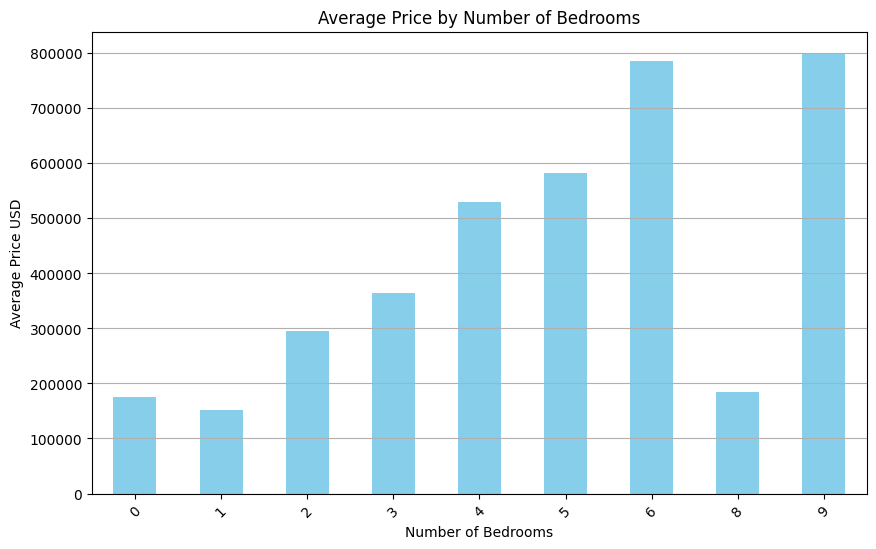

In [ ]:
#average_price_per_bedroom = average_price_per_bedroom.drop(7)
plt.figure(figsize=(10, 6))
average_price_per_bedroom.plot(kind='bar', color='skyblue')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price USD')
plt.xticks(rotation=45)
plt.grid(axis='y')


### 7.3. Distribution of Property Prices

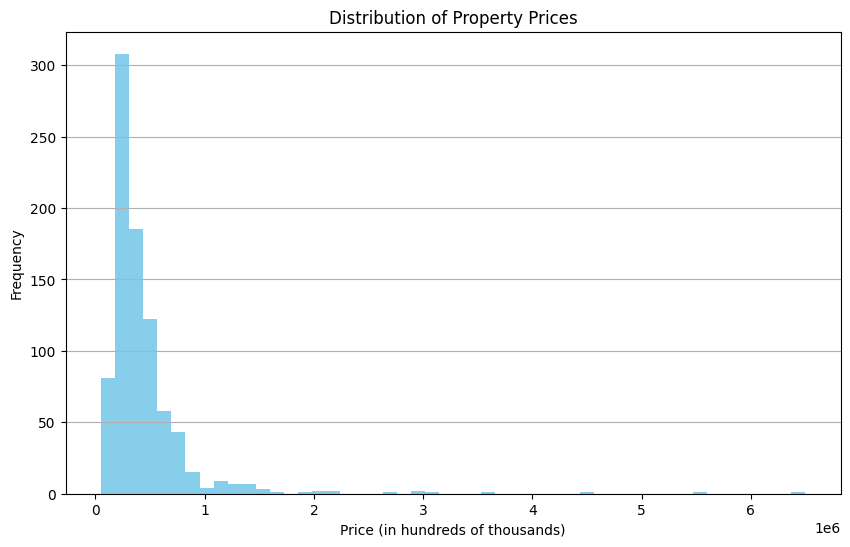

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
web_scrapper_api_property_data_df['price'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (in hundreds of thousands)')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()


## 8.Data Analysis with State Data

### What is the correlation between property prices and crime statistics in a state?

In [ ]:
import pandas as pd

# Calculating the correlation
correlation_matrix = web_scrapper_api_property_data_df[['price', 'count_burglary', 'count_stolen_property', 'count_vandalism']].corr(method='pearson')
correlation_matrix


,price,count_burglary,count_stolen_property,count_vandalism
price,1.000000,0.222126,0.238732,0.228305
count_burglary,0.222126,1.000000,0.917099,0.909232
count_stolen_property,0.238732,0.917099,1.000000,0.818858
count_vandalism,0.228305,0.909232,0.818858,1.000000


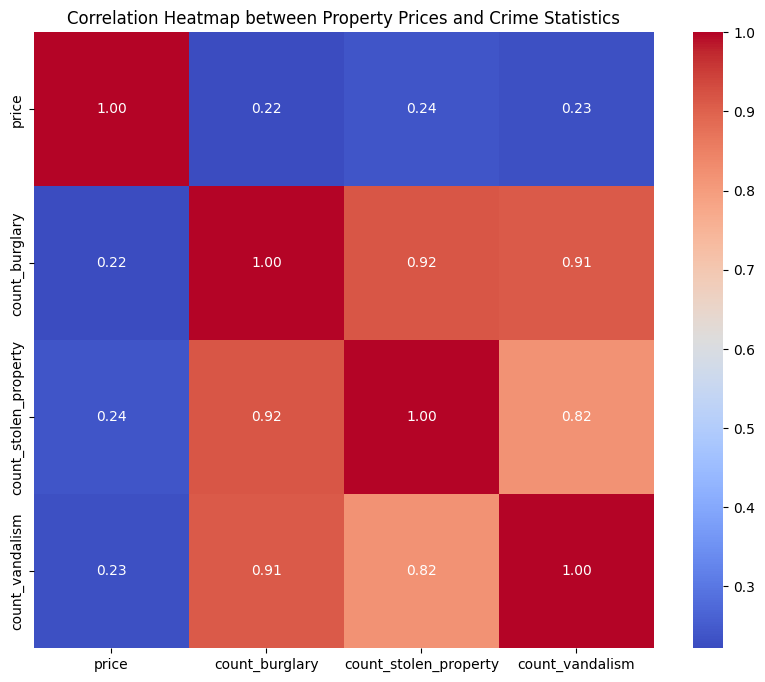

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Property Prices and Crime Statistics')
plt.show()

### How does the average price per square foot vary among states with different crime levels?

In [ ]:
# Calculating average price per square foot for each state

web_scrapper_api_property_data_df_copy = web_scrapper_api_property_data_df.copy(deep=True)

web_scrapper_api_property_data_df_copy['price_per_sq_ft'] = web_scrapper_api_property_data_df['price'] / web_scrapper_api_property_data_df['sq_ft']
avg_price_per_sq_ft = web_scrapper_api_property_data_df_copy.groupby('state')['price_per_sq_ft'].mean()

# Categorizing states based on crime rates (example method)
web_scrapper_api_property_data_df_copy['total_crimes'] = web_scrapper_api_property_data_df['count_burglary'] + web_scrapper_api_property_data_df['count_stolen_property'] + web_scrapper_api_property_data_df['count_vandalism']
crime_rate_categories = pd.qcut(web_scrapper_api_property_data_df_copy['total_crimes'], 3, labels=['Low', 'Medium', 'High'])

# Merging crime rate categories with the average price per sq ft
merged_df = web_scrapper_api_property_data_df_copy[['state', 'price_per_sq_ft', 'total_crimes']].drop_duplicates('state')
merged_df['crime_rate_category'] = pd.qcut(merged_df['total_crimes'], 3, labels=['Low', 'Medium', 'High'])

# Resultados
merged_df[['state', 'price_per_sq_ft', 'crime_rate_category']].sort_values(by='price_per_sq_ft', ascending=False)


,state,price_per_sq_ft,crime_rate_category
8,CA,707.801418,High
9,FL,378.024194,Low
347,ID,328.371278,Low
709,NH,296.134663,Low
82,NC,292.938931,High
187,CT,271.647699,Low
40,NV,252.541817,Medium
154,OR,252.086957,Medium
349,MA,239.520958,Medium
142,CO,238.758456,High


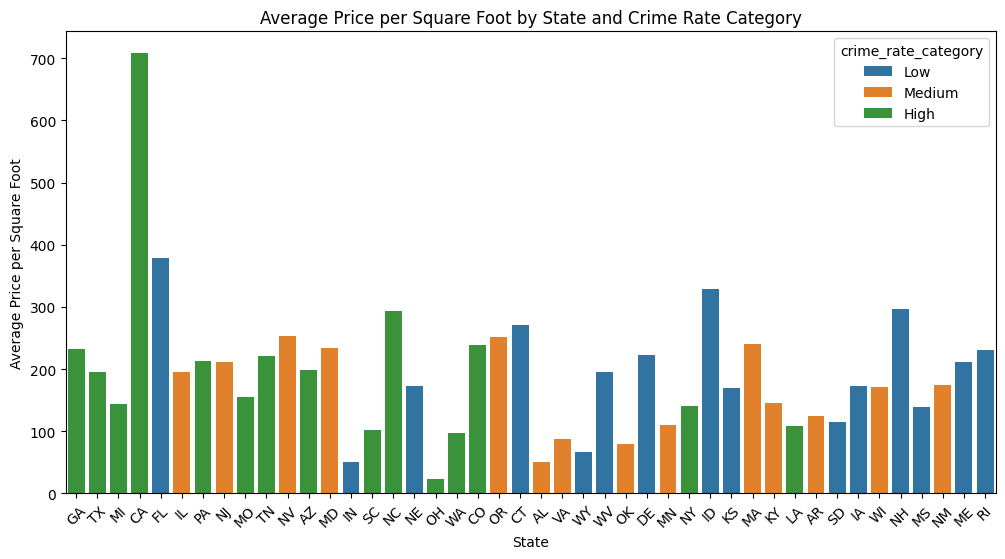

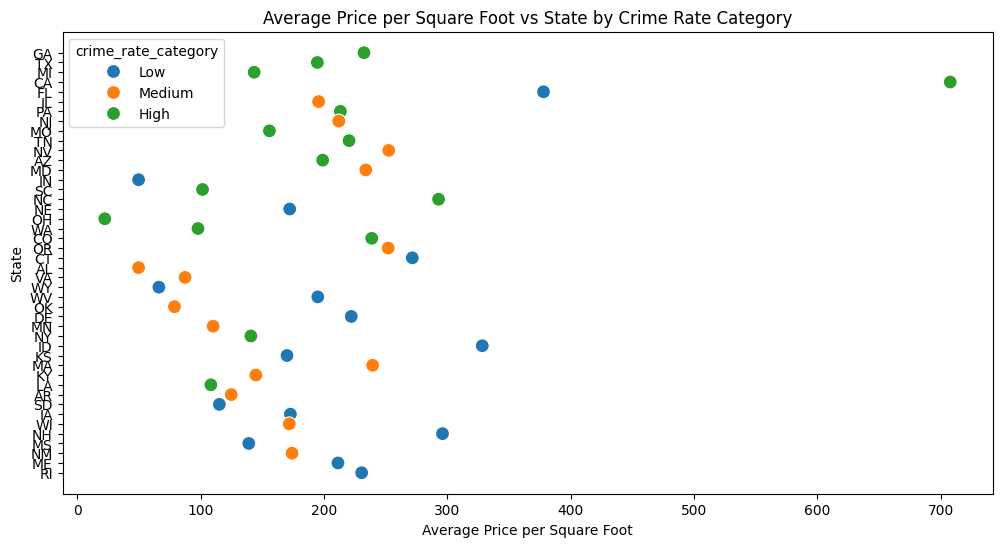

In [ ]:

#Bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='price_per_sq_ft', hue='crime_rate_category', data=merged_df)
plt.title('Average Price per Square Foot by State and Crime Rate Category')
plt.xlabel('State')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45)
plt.show()

# Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price_per_sq_ft', y='state', hue='crime_rate_category', data=merged_df, s=100)
plt.title('Average Price per Square Foot vs State by Crime Rate Category')
plt.xlabel('Average Price per Square Foot')
plt.ylabel('State')
plt.show()


### What is the relationship between the amount of crimes (burglary) and the number of bedrooms in properties?

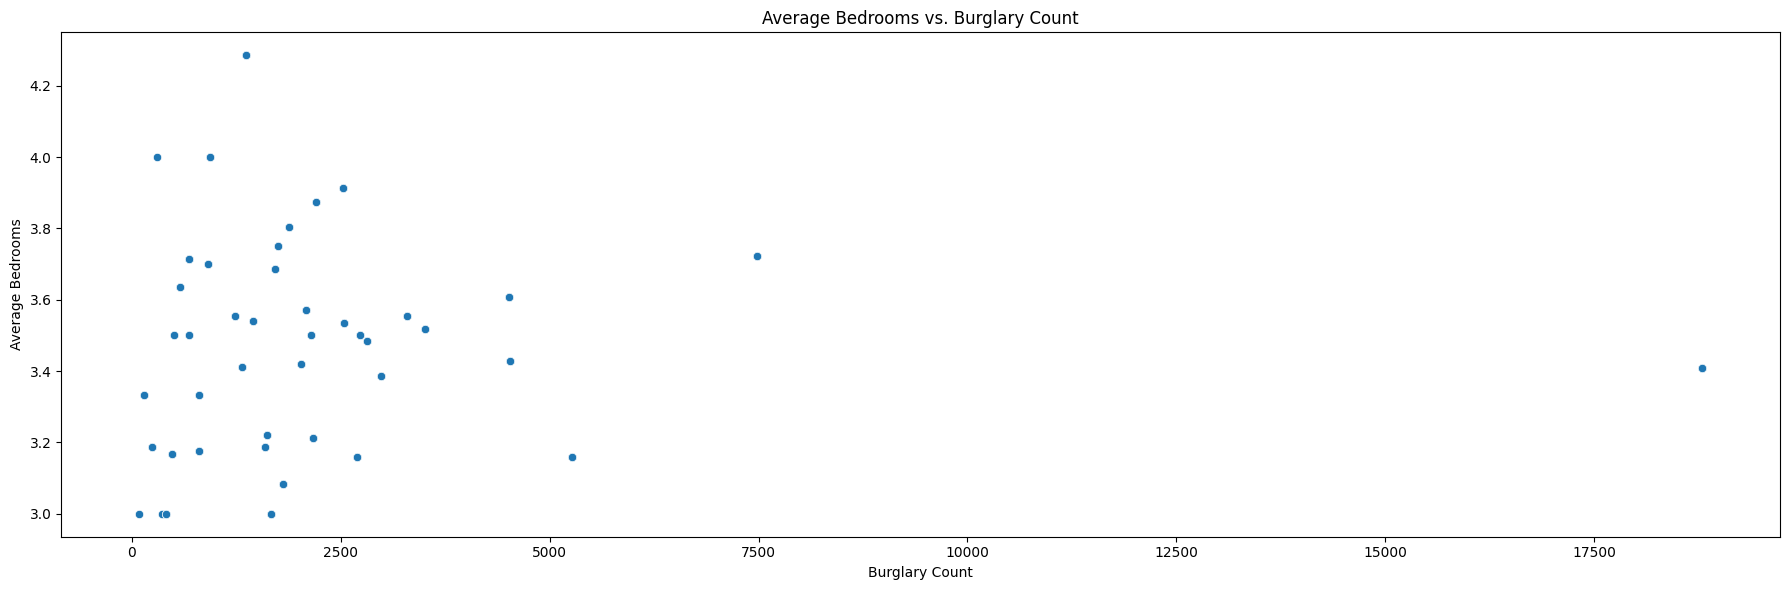

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculating the average number of bedrooms and bathrooms for different levels of crime rates
crime_columns = ['count_burglary']

web_scrapper_api_property_data_df_copy = web_scrapper_api_property_data_df.copy(deep=True)

for crime in crime_columns:
    web_scrapper_api_property_data_df_copy[f'avg_bedrooms_{crime}'] = web_scrapper_api_property_data_df.groupby(crime)['bedrooms'].transform('mean')

# Plotting scatter plots to visualize the relationships
plt.figure(figsize=(18, 6))

# Bedrooms vs Crimes
sns.scatterplot(x='count_burglary', y='avg_bedrooms_count_burglary', data=web_scrapper_api_property_data_df_copy)
plt.title('Average Bedrooms vs. Burglary Count')
plt.xlabel('Burglary Count')
plt.ylabel('Average Bedrooms')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

## 9.Data Analysis with new dataset and city information

### 9.1.Data Preparation

In [ ]:
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

def abbrev_to_fullname(abbrev):
    return state_abbreviations.get(abbrev, abbrev)  # Returns original abbreviation if not found in dictionary

web_scrapper_api_property_data_df['state_full'] = web_scrapper_api_property_data_df['state'].apply(abbrev_to_fullname)
web_scrapper_api_property_data_df

,id_location,price,state,bedrooms,bathrooms,sq_ft,count_burglary,count_stolen_property,count_vandalism,state_full
0,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3,3,1441,1885,2043,3664,Georgia
1,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3,3,1441,1885,2043,3664,Georgia
2,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,7486,1050,7669,Texas
3,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,7486,1050,7669,Texas
4,"46792 Oak Pointe Dr, Macomb, MI 48042 TOP AGEN...",329900,MI,4,2,2300,2168,2166,2837,Michigan
...,...,...,...,...,...,...,...,...,...,...
1216,"1203 Lashley Park Dr, Gibsonville, NC 27249 $1...",180000,NC,3,2,0,5273,3460,2707,North Carolina
1217,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5,3,2058,7486,1050,7669,Texas
1218,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5,3,2058,7486,1050,7669,Texas
1219,"11181 SW Aliceville Dr, Port Saint Lucie, FL 3...",569000,FL,3,3,2000,806,182,1454,Florida


In [ ]:

# Regular expression pattern to identify the format "city, state zip code"
pattern = re.compile(r'(?P<city>[a-zA-Z\s]+), [A-Z]{2} \d{5}')

# Extracting the city names
web_scrapper_api_property_data_df['city'] = web_scrapper_api_property_data_df['id_location'].apply(
    lambda x: pattern.search(x).group('city').strip() if pattern.search(x) else None
)

df_analysis = web_scrapper_api_property_data_df[["id_location", "price", "state", "bedrooms", "bathrooms", "sq_ft", "city", "state_full"]]
df_analysis

,id_location,price,state,bedrooms,bathrooms,sq_ft,city,state_full
0,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3,3,1441,Waleska,Georgia
1,"862 Lake Arrowhead Dr, Waleska, GA 30183 MLS I...",335000,GA,3,3,1441,Waleska,Georgia
2,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,San Antonio,Texas
3,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,San Antonio,Texas
4,"46792 Oak Pointe Dr, Macomb, MI 48042 TOP AGEN...",329900,MI,4,2,2300,Macomb,Michigan
...,...,...,...,...,...,...,...,...
1216,"1203 Lashley Park Dr, Gibsonville, NC 27249 $1...",180000,NC,3,2,0,Gibsonville,North Carolina
1217,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5,3,2058,Alamo,Texas
1218,"1316 Middle St, Alamo, TX 78516 EXP REALTY LLC...",286000,TX,5,3,2058,Alamo,Texas
1219,"11181 SW Aliceville Dr, Port Saint Lucie, FL 3...",569000,FL,3,3,2000,Port Saint Lucie,Florida


In [ ]:
df_crime_per_city = pd.read_csv("crime_250_plus.csv")
df_crime_per_city = df_crime_per_city.rename(columns={"cities":"city", "states":"state_full"})

df_crime_per_city['city'] = df_crime_per_city['city'].str.split(',')
df_crime_per_city = df_crime_per_city.explode('city')
df_crime_per_city['city'] = df_crime_per_city['city']
df_crime_per_city.reset_index(drop=True, inplace=True)
df_crime_per_city

,state_full,city,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,"1,216.84","3,730.21",506.78,"5,453.83",22.94
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",748.17,"3,619.66","1,047.98","5,415.82",20.93
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.38,259.47,314.41,"1,866.01",149.18,"2,329.61",NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,192.49,"1,137.59",55.76,"1,385.85",12.39
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,637.45,"3,426.36",466.56,"4,530.37",19.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Virginia,Virginia Beach,"454,353",2083.40,3.08,22.45,59.87,52.16,137.56,165.95,"1,667.65",101.02,"1,934.62",11.22
99,Washington,Seattle,"721,365",5911.99,3.74,36.87,210.02,382.05,632.69,"1,081.98","3,673.45",503.21,"5,258.64",20.66
100,Washington,Spokane,"217,066",7881.01,2.76,109.64,105.50,408.63,626.54,"1,023.19","5,408.03",800.22,"7,231.44",23.03
101,Wisconsin,Madison,"255,850",3040.46,4.30,37.13,82.86,250.15,374.44,362.32,"2,130.94",168.85,"2,662.11",3.91


In [ ]:
columns_to_drop = ['arson', 'vehicle_theft', 'larceny', 'agrv_assault', 'robbery', 'rape', 'murder', 'total_crime']
df_crime_per_city.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df_crime_per_city.dtypes

state_full           object
city                 object
population           object
tot_violent_crime    object
burglary             object
tot_prop_crim        object
dtype: object

In [ ]:
df_analysis_merged = pd.merge(
    left = df_analysis,
    right = df_crime_per_city,
    on=["city"]
)

df_analysis_merged

,id_location,price,state,bedrooms,bathrooms,sq_ft,city,state_full_x,state_full_y,population,tot_violent_crime,burglary,tot_prop_crim
0,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,San Antonio,Texas,Texas,"1,434,625",707.50,770.82,"4,844.84"
1,"121 FAIRMONT, San Antonio, TX 78204 LEVI RODGE...",270000,TX,3,2,1387,San Antonio,Texas,Texas,"1,434,625",707.50,770.82,"4,844.84"
2,"435 W KINGS HWY, San Antonio, TX 78212 KUPER S...",450000,TX,4,5,3660,San Antonio,Texas,Texas,"1,434,625",707.50,770.82,"4,844.84"
3,"435 W KINGS HWY, San Antonio, TX 78212 KUPER S...",450000,TX,4,5,3660,San Antonio,Texas,Texas,"1,434,625",707.50,770.82,"4,844.84"
4,"819 HOUSE SPARROW, San Antonio, TX 78253 EXQUI...",265000,TX,3,2,1644,San Antonio,Texas,Texas,"1,434,625",707.50,770.82,"4,844.84"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,"19504 Stansbury St, Detroit, MI 48235 EXP REAL...",145000,MI,3,2,1700,Detroit,Michigan,Michigan,"670,792","2,056.67","1,231.08","4,540.60"
221,"8467 Plainview Ave, Detroit, MI 48228 OWN IT R...",139900,MI,3,2,1800,Detroit,Michigan,Michigan,"670,792","2,056.67","1,231.08","4,540.60"
222,"17380 Pinehurst St, Detroit, MI 48221 EXP REAL...",169900,MI,3,2,1649,Detroit,Michigan,Michigan,"670,792","2,056.67","1,231.08","4,540.60"
223,"1436 N Stout St, Wichita, KS 67235 KELLER WILL...",259900,KS,4,3,2198,Wichita,Kansas,Kansas,"391,084","1,022.29",838.95,"5,535.64"


In [ ]:
# Convert 'tot_violent_crime' and 'burglary' to numeric, coercing errors to NaN
df_analysis_merged['tot_violent_crime'] = pd.to_numeric(df_analysis_merged['tot_violent_crime'], errors='coerce')
df_analysis_merged['burglary'] = pd.to_numeric(df_analysis_merged['burglary'], errors='coerce')
df_analysis_merged['tot_prop_crim'] = pd.to_numeric(df_analysis_merged['tot_prop_crim'], errors='coerce')

df_analysis_merged.dtypes

id_location           object
price                  int64
state                 object
bedrooms               int64
bathrooms              int64
sq_ft                  int64
city                  object
state_full_x          object
state_full_y          object
population            object
tot_violent_crime    float64
burglary             float64
tot_prop_crim        float64
dtype: object

### 9.2. Question

### Is there a correlation between property prices and the rate of violent crimes in the area?

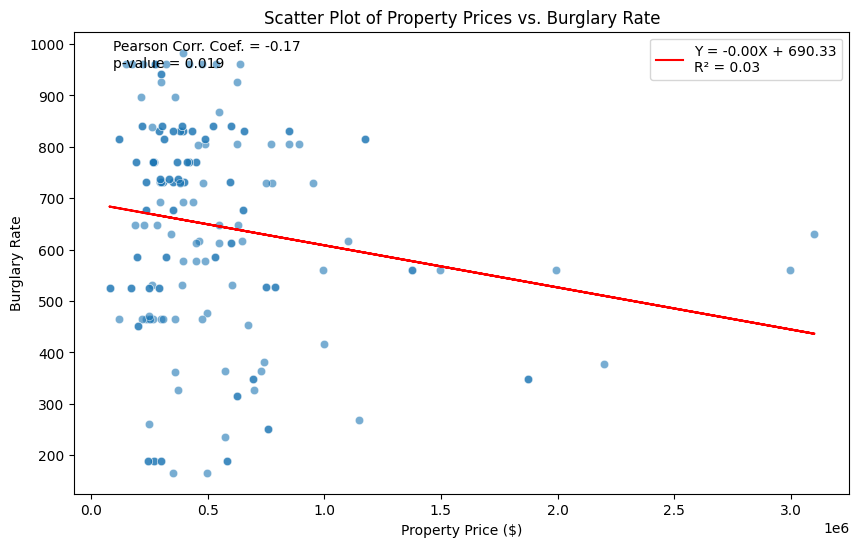

(PearsonRResult(statistic=-0.16635920041562952, pvalue=0.019469982191153392),
 0.02767538356292757)

In [ ]:
df_cleaned = df_analysis_merged.dropna(subset=['price', 'burglary'])

# Assuming df_cleaned is the DataFrame used to create the scatter plot
threshold = 5000000  # Set threshold for the property price
df_cleaned = df_cleaned[df_cleaned['price'] <= threshold]


correlation = stats.pearsonr(df_cleaned['price'], df_cleaned['burglary'])

slope, intercept, r_value, p_value, std_err = stats.linregress(df_cleaned['price'], df_cleaned['burglary'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='price', y='burglary', alpha=0.6)

line = slope * df_cleaned['price'] + intercept
plt.plot(df_cleaned['price'], line, color='red', label=f'Y = {slope:.2f}X + {intercept:.2f}\nR² = {r_value**2:.2f}')

plt.text(0.05, 0.95, f'Pearson Corr. Coef. = {correlation[0]:.2f}\np-value = {correlation[1]:.2g}',
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.xlabel('Property Price ($)')
plt.ylabel('Burglary Rate')
plt.title('Scatter Plot of Property Prices vs. Burglary Rate')

plt.legend()

plt.show()

correlation, r_value**2

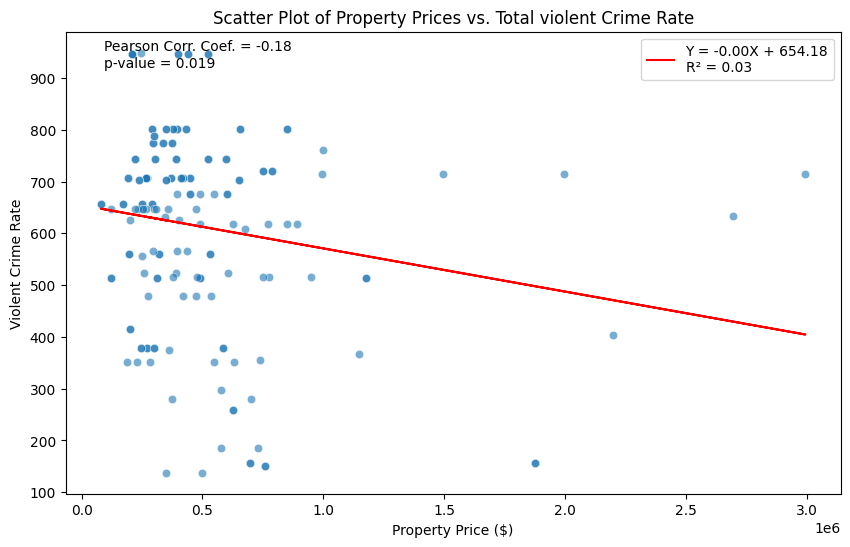

(PearsonRResult(statistic=-0.17855251965430993, pvalue=0.018753964391418063),
 0.03188100227490281)

In [ ]:
df_cleaned = df_analysis_merged.dropna(subset=['price', 'tot_violent_crime'])

# Assuming df_cleaned is the DataFrame used to create the scatter plot
threshold = 5000000  # Set threshold for the property price
df_cleaned = df_cleaned[df_cleaned['price'] <= threshold]


correlation = stats.pearsonr(df_cleaned['price'], df_cleaned['tot_violent_crime'])

slope, intercept, r_value, p_value, std_err = stats.linregress(df_cleaned['price'], df_cleaned['tot_violent_crime'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='price', y='tot_violent_crime', alpha=0.6)

line = slope * df_cleaned['price'] + intercept
plt.plot(df_cleaned['price'], line, color='red', label=f'Y = {slope:.2f}X + {intercept:.2f}\nR² = {r_value**2:.2f}')

plt.text(0.05, 0.95, f'Pearson Corr. Coef. = {correlation[0]:.2f}\np-value = {correlation[1]:.2g}',
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.xlabel('Property Price ($)')
plt.ylabel('Violent Crime Rate')
plt.title('Scatter Plot of Property Prices vs. Total violent Crime Rate')

plt.legend()

plt.show()

correlation, r_value**2

In [ ]:
from sqlalchemy import create_engine

# Create an SQLAlchemy engine
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}"
                       .format(user="root",
                               pw="",
                               host="127.0.0.1",
                               db="web_scrapper_api_property_data"))

# Use the pandas 'to_sql' method to write the DataFrame to a new table in the MySQL database
df_analysis_merged.to_sql('bigcities250', con=engine, if_exists='fail', index=False)


-1